# Fine-Tuning OpenAI's Language Model for Enhanced Medical Content Understanding


In this notebook, we'll fine-tune an advanced OpenAI language model on the MTSamples dataset to improve its understanding and generation of medical content, enhancing its utility for healthcare professionals, researchers, and students.

While large language models excel in a variety of topics, their performance in specialized fields like medicine can be limited due to restricted exposure to high-quality medical data and the complexity of medical terminology.

LLMs are generalists by design and may struggle with the depth and accuracy required for medical content, as they are not specifically trained on specialized medical data and concepts

In [1]:
! pip install openai

In [1]:
import openai

In [2]:
print(openai.__version__)

1.14.2


In [3]:
import os

In [4]:
from openai import OpenAI

In [5]:
client = OpenAI() #set your key as env variable

In [7]:
#from openai import OpenAI
#client = OpenAI()

completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Tell me about India!"}
  ]
)

In [17]:
print(completion.choices[0].message.content)

India is a large and diverse country located in South Asia. It is known for its rich history, cultural heritage, and various contributions to art, science, and literature. With a population of over 1.3 billion people, India is the second most populous country in the world.

India is known for its vibrant festivals, delicious cuisine, and diverse landscapes ranging from the snowy peaks of the Himalayas to the sandy beaches of Goa. The country is also home to several UNESCO World Heritage Sites, such as the Taj Mahal, Jaipur's Pink City, and the historic monuments of Hampi.

India has a mixed economy with agriculture, manufacturing, and services sectors playing a significant role in its growth. The country is also known for its Bollywood film industry, which produces a large number of movies every year.

India is a secular country with a rich tapestry of religions and cultures. Hinduism, Islam, Christianity, Sikhism, Buddhism, and Jainism are some of the major religions practiced in Indi

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
medical_reports = pd.read_csv('reports_copy.csv')

In [8]:
medical_reports.head()

,medical_specialty,report
0,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
1,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...
2,Cardiovascular / Pulmonary,"2-D ECHOCARDIOGRAM,Multiple views of the heart..."
3,Cardiovascular / Pulmonary,"DESCRIPTION:,1. Normal cardiac chambers size...."
4,Cardiovascular / Pulmonary,"2-D STUDY,1. Mild aortic stenosis, widely calc..."


In [9]:
medical_reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   medical_specialty  2179 non-null   object
 1   report             2179 non-null   object
dtypes: object(2)
memory usage: 34.2+ KB


In [10]:
medical_reports.groupby('medical_specialty').count()

,report
medical_specialty,
Cardiovascular / Pulmonary,371
Gastroenterology,224
Neurology,223
Radiology,273
Surgery,1088


In [11]:
grouped_data = medical_reports.groupby('medical_specialty').sample(110, random_state=42)

In [12]:
grouped_data.groupby('medical_specialty').count()

,report
medical_specialty,
Cardiovascular / Pulmonary,110
Gastroenterology,110
Neurology,110
Radiology,110
Surgery,110


In [13]:
val_test_data = grouped_data.groupby('medical_specialty').sample(10, random_state=42)

In [14]:
val_test_data

,medical_specialty,report
2167,Cardiovascular / Pulmonary,"HISTORY OF PRESENT ILLNESS:, I was kindly ask..."
2041,Cardiovascular / Pulmonary,"EXAM: , CT chest with contrast.,HISTORY: , Abn..."
1865,Cardiovascular / Pulmonary,"INDICATIONS:, Atrial fibrillation, coronary d..."
1924,Cardiovascular / Pulmonary,"MEDICATIONS: , Plavix, atenolol, Lipitor, and ..."
2028,Cardiovascular / Pulmonary,"PROCEDURE:,1. Implantation, dual chamber ICD...."
2016,Cardiovascular / Pulmonary,"CLINICAL INDICATION:, Chest pain.,INTERPRETAT..."
1833,Cardiovascular / Pulmonary,"INDICATIONS: , The patient is a 22-year-old fe..."
1932,Cardiovascular / Pulmonary,"REASON FOR CONSULTATION: , Loculated left effu..."
1949,Cardiovascular / Pulmonary,"PREOPERATIVE DIAGNOSIS:, Right middle lobe lu..."
1847,Cardiovascular / Pulmonary,"POSTOPERATIVE DIAGNOSIS: , Type 4 thoracoabdom..."


In [15]:
#val_test_data['medical_specialty'].value_counts()

val = val_test_data.groupby('medical_specialty').head(5)
test = val_test_data.groupby('medical_specialty').tail(5)

In [16]:
train = grouped_data[~grouped_data.index.isin(val_test_data.index)]

In [17]:
train['medical_specialty'].value_counts()

Cardiovascular / Pulmonary    100
Gastroenterology              100
Neurology                     100
Radiology                     100
Surgery                       100
Name: medical_specialty, dtype: int64

In [18]:
import tiktoken

In [19]:
def num_of_token_from_string(string):
    
    encoding = tiktoken.get_encoding("cl100k_base")
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [20]:
num_of_token_from_string('hello how are you')

4

In [21]:
reports_length = train['report'].apply(num_of_token_from_string)

In [22]:
reports_length.describe()

count     500.000000
mean      674.788000
std       427.809075
min        14.000000
25%       358.000000
50%       593.500000
75%       904.000000
max      3701.000000
Name: report, dtype: float64

In [23]:
price_model = 0.008

In [24]:
price_per_epoch = reports_length.sum() * 0.008/1000

In [25]:
price_per_epoch

2.699152

In [26]:
system_prompt = "Given the medical description report, classify it into one of these categories: " + \
                 "[Cardiovascular / Pulmonary, Gastroenterology, Neurology, Radiology, Surgery]"

In [36]:
message_prompt = {"messages":[{"role":"system", "content":system_prompt},
                              {"role":"user", "content":train['report'].iloc[0]},
                              {"role":"assistant", "content":test['medical_specialty'].iloc[0]}]}

In [28]:
print(message_prompt)

{'messages': [{'role': 'system', 'content': 'Given the medical description report, classify it into one of these categories: [Cardiovascular / Pulmonary, Gastroenterology, Neurology, Radiology, Surgery]'}, {'role': 'system', 'content': "PREOPERATIVE DIAGNOSES:,1.  Lumbar osteomyelitis.,2.  Need for durable central intravenous access.,POSTOPERATIVE DIAGNOSES:,1.  Lumbar osteomyelitis.,2.  Need for durable central intravenous access.,ANESTHESIA:,  General.,PROCEDURE:,  Placement of left subclavian 4-French Broviac catheter.,INDICATIONS:  ,The patient is a toddler admitted with a limp and back pain, who was eventually found on bone scan and septic workup to have probable osteomyelitis of the lumbar spine at disk areas.  The patient needs prolonged IV antibiotic therapy, but attempt at a PICC line failed.  She has exhausted most of her easy peripheral IV access routes and referral was made to the Pediatric Surgery Service for Broviac placement.  I met with the patient's mom.  With the help

In [29]:
def df_to_format(df):
    
    messages = []
    
    for index, row in df.iterrows():
        
        message_prompt = {"messages":[{"role":"system", "content":system_prompt},
                                      {"role":"user", "content":row['report']},
                                      {"role":"assistant", "content":row['medical_specialty']}]}
                                      
                                      
        messages.append(message_prompt)
    return messages
    

In [30]:
data = df_to_format(train)

In [31]:
print(data[4])

{'messages': [{'role': 'system', 'content': 'Given the medical description report, classify it into one of these categories: [Cardiovascular / Pulmonary, Gastroenterology, Neurology, Radiology, Surgery]'}, {'role': 'user', 'content': "EXAM: , Coronary artery CTA with calcium scoring and cardiac function.,HISTORY: , Chest pain.,TECHNIQUE AND FINDINGS: , Coronary artery CTA was performed on a Siemens dual-source CT scanner.  Post-processing on a Vitrea workstation.  150 mL Ultravist 370 was utilized as the intravenous contrast agent.  Patient did receive nitroglycerin sublingually prior to the contrast.,HISTORY: , Significant for high cholesterol, overweight, chest pain, family history,Patient's total calcium score (Agatston) is 10. his places the patient just below the 75th percentile for age.,The LAD has a moderate area of stenosis in its midportion due to a focal calcified plaque.  The distal LAD was unreadable while the proximal was normal.  The mid and distal right coronary artery a

In [32]:
import json

In [33]:
with open('fine_tune_data_v2.jsonl','w') as f:
    for entry in data:
        f.write(json.dumps(entry))
        f.write("\n")

In [34]:
val_data = df_to_format(val)

In [35]:
with open('fine_tuning_data_val_v2.jsonl','w') as f:
    for entry in val_data:
        f.write(json.dumps(entry))
        f.write("\n")

In [38]:
open('fine_tune_data_v2.jsonl')

<_io.TextIOWrapper name='fine_tune_data_v2.jsonl' mode='r' encoding='cp1252'>

In [37]:
file_upload_response = client.files.create(file = open('fine_tune_data_v2.jsonl', 'rb'),
                                          purpose='fine-tune')

In [39]:
file_upload_response

FileObject(id='file-FFEm13jY4t72A6wQWTNlWX60', bytes=1544122, created_at=1718500667, filename='fine_tune_data_v2.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)

In [40]:
file_upload_response_val = client.files.create(file=open('fine_tuning_data_val_v2.jsonl','rb'),
                                              purpose='fine-tune')

In [41]:
file_upload_response_val

FileObject(id='file-rsvoD2rnAxiYk4wJ4aJ2aSV4', bytes=101509, created_at=1718501016, filename='fine_tuning_data_val_v2.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)

In [42]:
fine_tuning_respose = client.fine_tuning.jobs.create(training_file=file_upload_response.id,
                                                    model='gpt-3.5-turbo',
                                                    hyperparameters={'n_epochs':1},
                                                    validation_file=file_upload_response_val.id)

In [43]:
fine_tuning_respose

FineTuningJob(id='ftjob-dEYR5O0iDOvsyyG9leWX5FT7', created_at=1718501377, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs=1, batch_size='auto', learning_rate_multiplier='auto'), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-Oe3dPFBB1ZiqizpTQTn9zAEQ', result_files=[], status='validating_files', trained_tokens=None, training_file='file-FFEm13jY4t72A6wQWTNlWX60', validation_file='file-rsvoD2rnAxiYk4wJ4aJ2aSV4', user_provided_suffix=None, seed=1353216648, estimated_finish=None, integrations=[])

In [44]:
client.fine_tuning.jobs.list()

SyncCursorPage[FineTuningJob](data=[FineTuningJob(id='ftjob-dEYR5O0iDOvsyyG9leWX5FT7', created_at=1718501377, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs=1, batch_size=1, learning_rate_multiplier=2), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-Oe3dPFBB1ZiqizpTQTn9zAEQ', result_files=[], status='running', trained_tokens=None, training_file='file-FFEm13jY4t72A6wQWTNlWX60', validation_file='file-rsvoD2rnAxiYk4wJ4aJ2aSV4', user_provided_suffix=None, seed=1353216648, estimated_finish=1718503576, integrations=[])], object='list', has_more=False)

In [46]:
train_events = client.fine_tuning.jobs.list_events(fine_tuning_job_id='ftjob-dEYR5O0iDOvsyyG9leWX5FT7')

In [60]:
train_events.data[2].data['valid_loss']

4.76837158203125e-07

In [68]:
train_loss = []
val_loss = []

for item in train_events.data:
    
    train_data = item.data
    
    if train_data:
        if 'train_loss' in train_data:
            train_loss.append(train_data['train_loss'])
            
        if 'valid_loss' in train_data:
            val_loss.append(train_data['valid_loss'])
            
train_loss.reverse()
val_loss.reverse()     

In [70]:
len(train_loss)

18

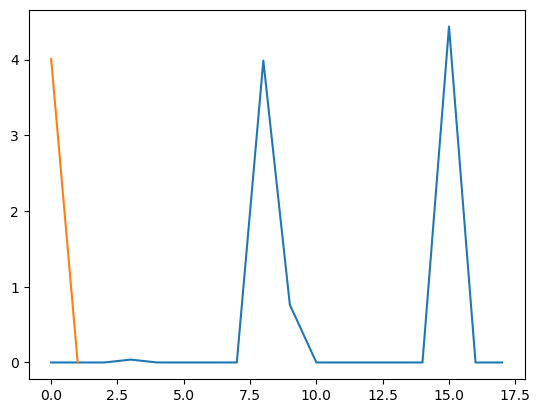

In [71]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(train_loss)
plt.plot(val_loss)

In [75]:
test_report = test['report'].iloc[1]

In [78]:
completion = client.chat.completions.create(model = 'ft:gpt-3.5-turbo-0125:personal::9aZJEjmG',
                              messages=[
                                  {"role":"system","content":system_prompt},
                                  {"role":"user","content":test_report}])

ChatCompletion(id='chatcmpl-9aZqTFFnJHYyNfzXjITztsOoPZBJ2', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Cardiovascular / Pulmonary', role='assistant', function_call=None, tool_calls=None))], created=1718504625, model='ft:gpt-3.5-turbo-0125:personal::9aZJEjmG', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=6, prompt_tokens=309, total_tokens=315))